### EDA Report for the Preprocessing and Feature Engineering Phase 

#### We'll explore the data, visualize sentiment distributions, analyze text patterns, and extract insights to better understand tourist experiences.


In [1]:
import  pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings


In [2]:
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = (8, 5)

In [4]:
df = pd.read_csv(r'Egypt_Tourism_Sentiment_Analysis.csv')

In [5]:
print(f"Data shape: {df.shape}")
df.head()


Data shape: (38395, 3)


,review,processed_review,sentiment_ensemble
0,Well worth going to visit. If you are getting ...,well worth going visit getting tour fantastic ...,positive
1,The splendor of the pyramidsThe Seven Wonders ...,splendor pyramidsthe seven wonder world seen p...,positive
2,The pyramids are among the most beautiful arch...,pyramid among beautiful archaeological site wo...,positive
3,"yes it crowded, yes there is some tourist trap...",yes crowded yes tourist trap yes queue frustra...,positive
4,"History & Mystery of The Pyramids, What a Day,...",history mystery pyramid day hit visit land leg...,positive


In [6]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
review                0
processed_review      0
sentiment_ensemble    1
dtype: int64


In [7]:
df.dropna(inplace=True)
print(f"Data shape after dropping missing values: {df.shape}")

Data shape after dropping missing values: (38394, 3)


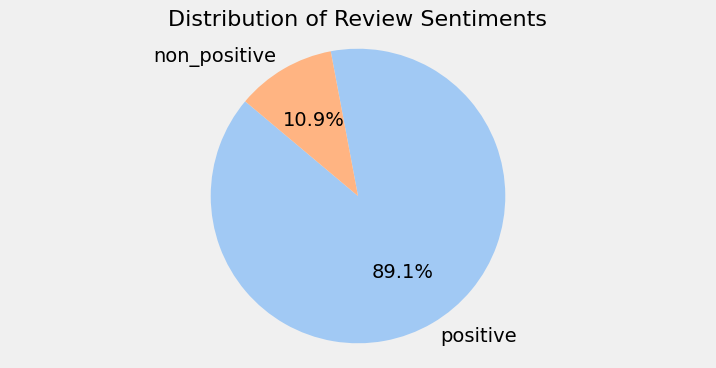

In [8]:
# Create a pie chart for sentiment distribution
sentiment_counts = df['sentiment_ensemble'].value_counts()
plt.figure(figsize=(8, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Review Sentiments', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

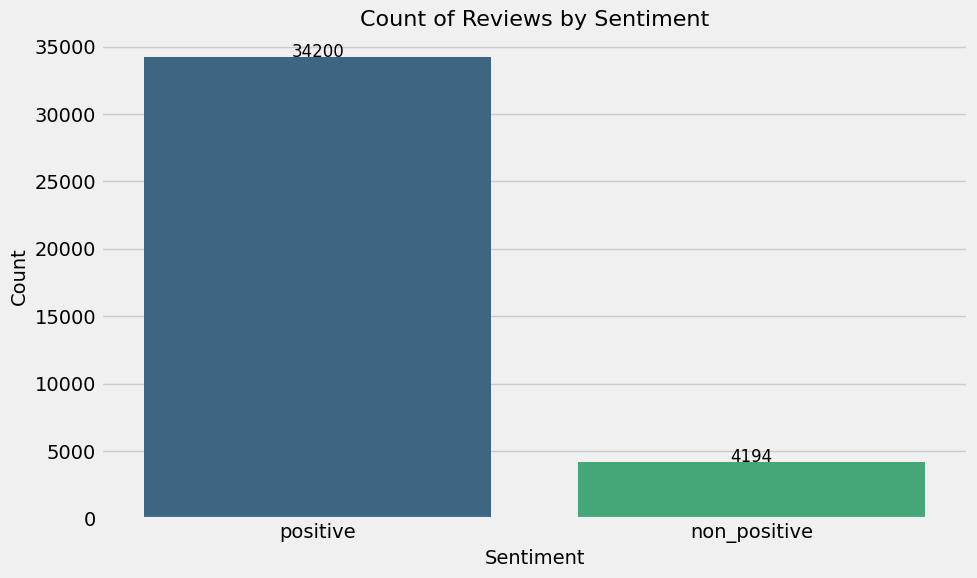

In [9]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Count of Reviews by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Add count labels on top of the bars
for i, v in enumerate(sentiment_counts.values):
    ax.text(i, v + 5, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
# Calculate text length for each review
df['review_length'] = df['review'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

# Statistical summary of text length by sentiment
print("Review length statistics by sentiment:")
print(df.groupby('sentiment_ensemble')['review_length'].describe())

Review length statistics by sentiment:
                      count        mean         std   min    25%    50%  \
sentiment_ensemble                                                        
non_positive         4194.0  435.469957  363.020026  50.0  178.0  302.0   
positive            34200.0  352.130292  298.194476  49.0  158.0  248.0   

                       75%     max  
sentiment_ensemble                  
non_positive        567.75  2212.0  
positive            429.25  4500.0  


In [11]:
from sklearn.feature_extraction.text import CountVectorizer


In [12]:
def get_top_n_words(corpus, n=20):
    """
    Returns the top n words in a corpus
    """
    # Initialize CountVectorizer
    vec = CountVectorizer(stop_words='english')
    # Fit and transform the corpus
    if len(corpus) == 0:
        return []
    bag_of_words = vec.fit_transform(corpus)
    # Get feature names (words)
    words = vec.get_feature_names_out()
    # Sum up the counts of each word
    sum_words = bag_of_words.sum(axis=0)
    # Put the counts and words in a dataframe
    words_freq = [(word, sum_words[0, idx]) for idx, word in enumerate(words)]
    # Sort by frequency
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    # Return top n
    return words_freq[:n]

Text(0, 0.5, 'Word')

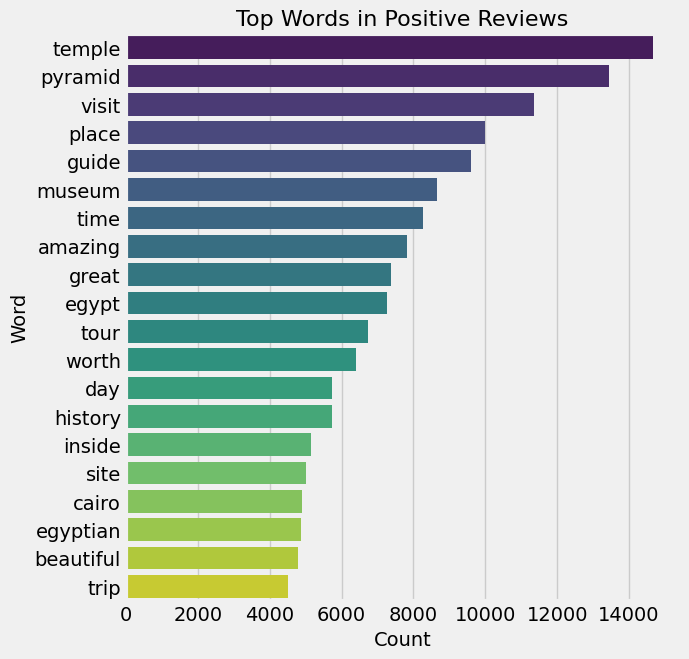

In [13]:
# Get top words for positive sentiment
positive_reviews = df[df['sentiment_ensemble'] == 'positive']['processed_review'].dropna().astype(str)
top_positive_words = get_top_n_words(positive_reviews)

# Get top words for non-positive sentiment
non_positive_reviews = df[df['sentiment_ensemble'] == 'non_positive']['processed_review'].dropna().astype(str)
top_non_positive_words = get_top_n_words(non_positive_reviews)

# Create dataframes for plotting
positive_df = pd.DataFrame(top_positive_words, columns=['word', 'count'])
non_positive_df = pd.DataFrame(top_non_positive_words, columns=['word', 'count'])

# Plot top words for positive reviews
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='count', y='word', data=positive_df, palette='viridis')
plt.title('Top Words in Positive Reviews', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Word', fontsize=14)

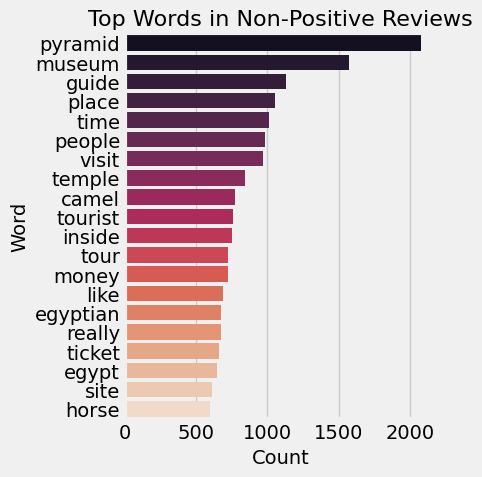

In [14]:

# Plot top words for non-positive reviews
plt.subplot(1, 2, 2)
sns.barplot(x='count', y='word', data=non_positive_df, palette='rocket')
plt.title('Top Words in Non-Positive Reviews', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Word', fontsize=14)

plt.tight_layout()
plt.show()

In [15]:
# Function to generate word cloud
def generate_wordcloud(text, title, colormap='viridis'):
    if len(text) == 0:
        print(f"No text available for: {title}")
        return
        
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         colormap=colormap,
                         max_words=100,
                         contour_width=3,
                         contour_color='steelblue').generate(' '.join(text))
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

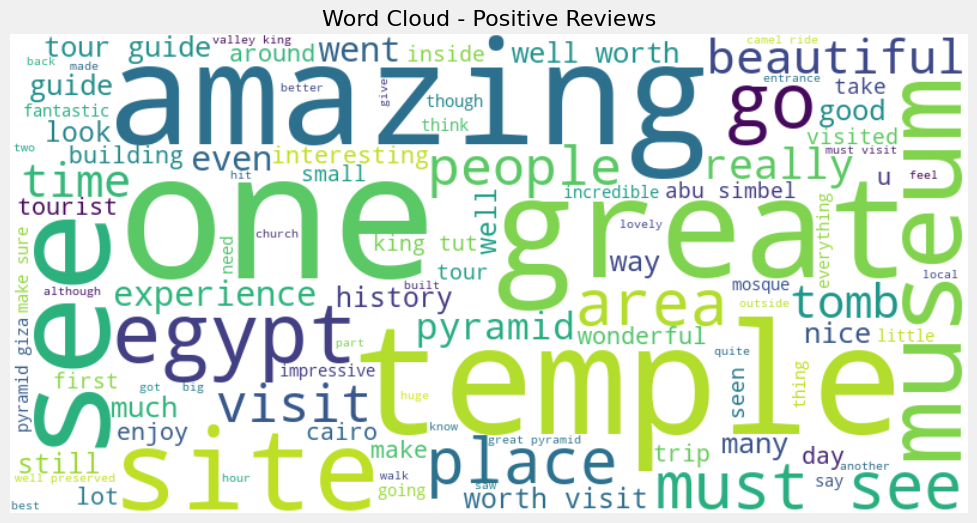

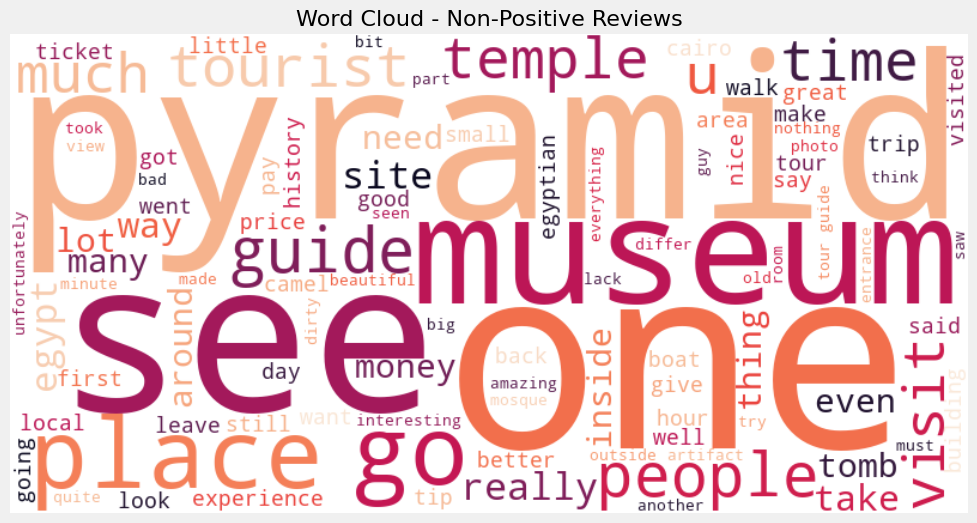

In [16]:
generate_wordcloud(positive_reviews, 'Word Cloud - Positive Reviews', 'viridis')
generate_wordcloud(non_positive_reviews, 'Word Cloud - Non-Positive Reviews', 'rocket')

In [17]:
# Interactive bar chart for word frequency in positive reviews
fig = px.bar(positive_df.head(15), x='count', y='word', orientation='h',
            title='Top 15 Words in Positive Reviews',
            color='count', color_continuous_scale='viridis')

fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    xaxis_title='Count',
    yaxis_title='Word',
    font=dict(size=12)
)

fig.show()

In [18]:
# Interactive bar chart for word frequency in non-positive reviews
fig = px.bar(non_positive_df.head(15), x='count', y='word', orientation='h',
            title='Top 15 Words in Non-Positive Reviews',
            color='count', color_continuous_scale='viridis')  # Replaced 'rocket' with 'viridis'

fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    xaxis_title='Count',
    yaxis_title='Word',
    font=dict(size=12)
)

fig.show()

In [19]:
def identify_topic(text):
    """
    A simple function to identify topics in reviews based on keywords
    """
    text = text.lower()
    
    if any(word in text for word in ['amazing', 'incredible', 'breathtaking', 'awesome']):
        return 'Overall Experience'
    elif any(word in text for word in ['driver', 'taxi', 'guide', 'tour']):
        return 'Tour Guides & Services'
    elif any(word in text for word in ['camel', 'ride', 'horse']):
        return 'Activities'
    elif any(word in text for word in ['crowd', 'queue', 'wait', 'busy']):
        return 'Crowds & Waiting'
    elif any(word in text for word in ['price', 'expensive', 'cost', 'overpriced']):
        return 'Pricing'
    else:
        return 'Other'


Topic Distribution:
topic
Other                     15830
Tour Guides & Services     9770
Overall Experience         9585
Activities                 1314
Crowds & Waiting           1097
Pricing                     798
Name: count, dtype: int64


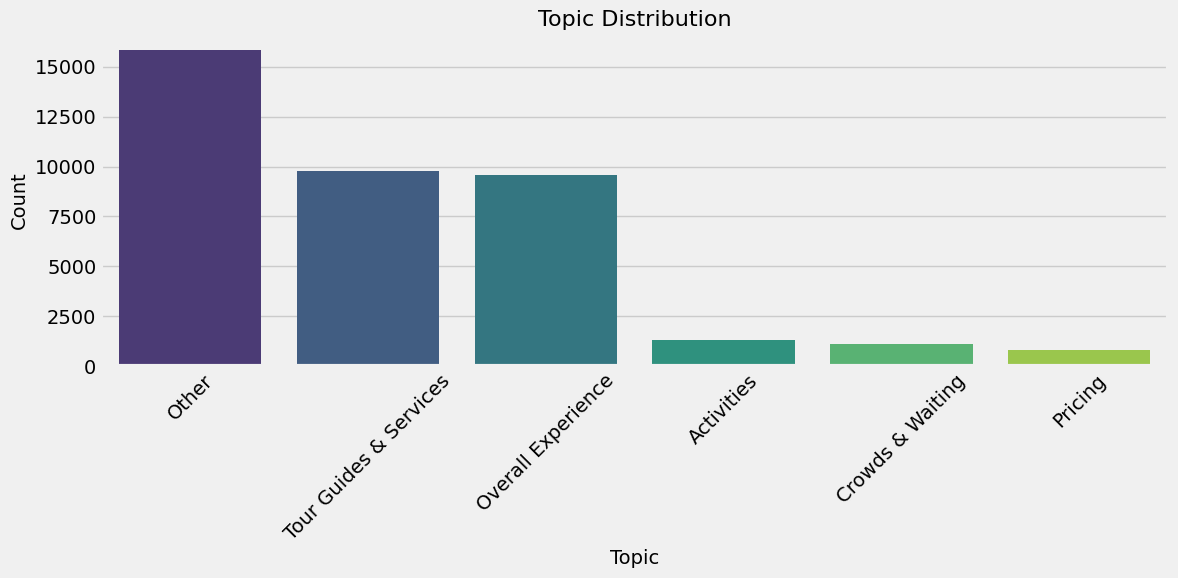

In [20]:

# Apply topic identification
df['topic'] = df['review'].apply(lambda x: identify_topic(str(x)) if pd.notna(x) else 'Unknown')

# Count of topics
topic_counts = df['topic'].value_counts()
print("Topic Distribution:")
print(topic_counts)

# Create a bar chart for topic distribution
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')
plt.title('Topic Distribution', fontsize=16)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

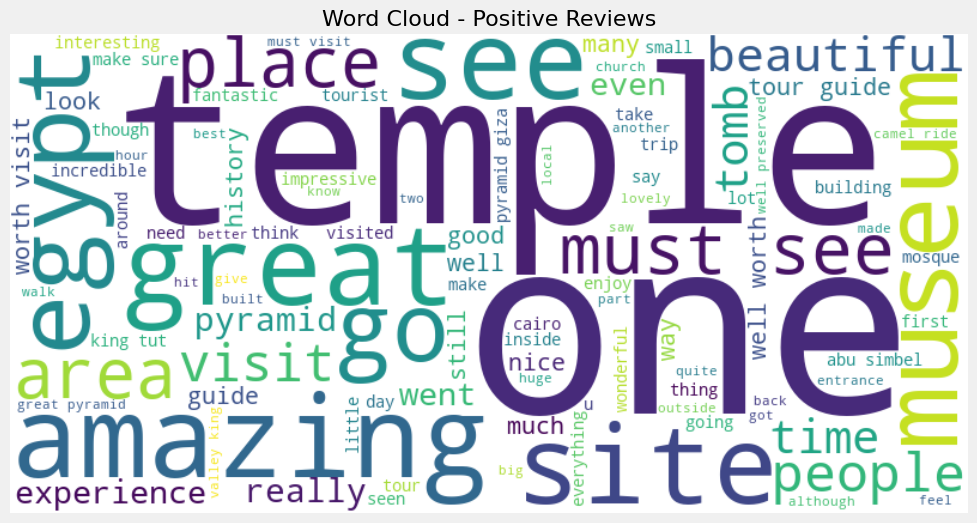

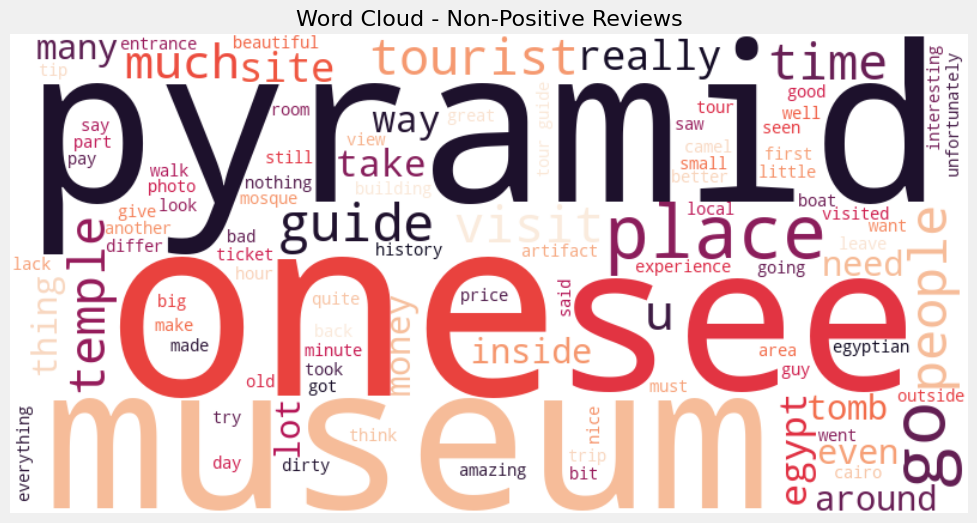

In [21]:
# Function to generate word cloud
def generate_wordcloud(text, title, colormap='viridis'):
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         colormap=colormap,
                         max_words=100,
                         contour_width=3,
                         contour_color='steelblue').generate(' '.join(text))
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Generate word clouds for positive and non-positive reviews
generate_wordcloud(positive_reviews, 'Word Cloud - Positive Reviews', 'viridis')
generate_wordcloud(non_positive_reviews, 'Word Cloud - Non-Positive Reviews', 'rocket')

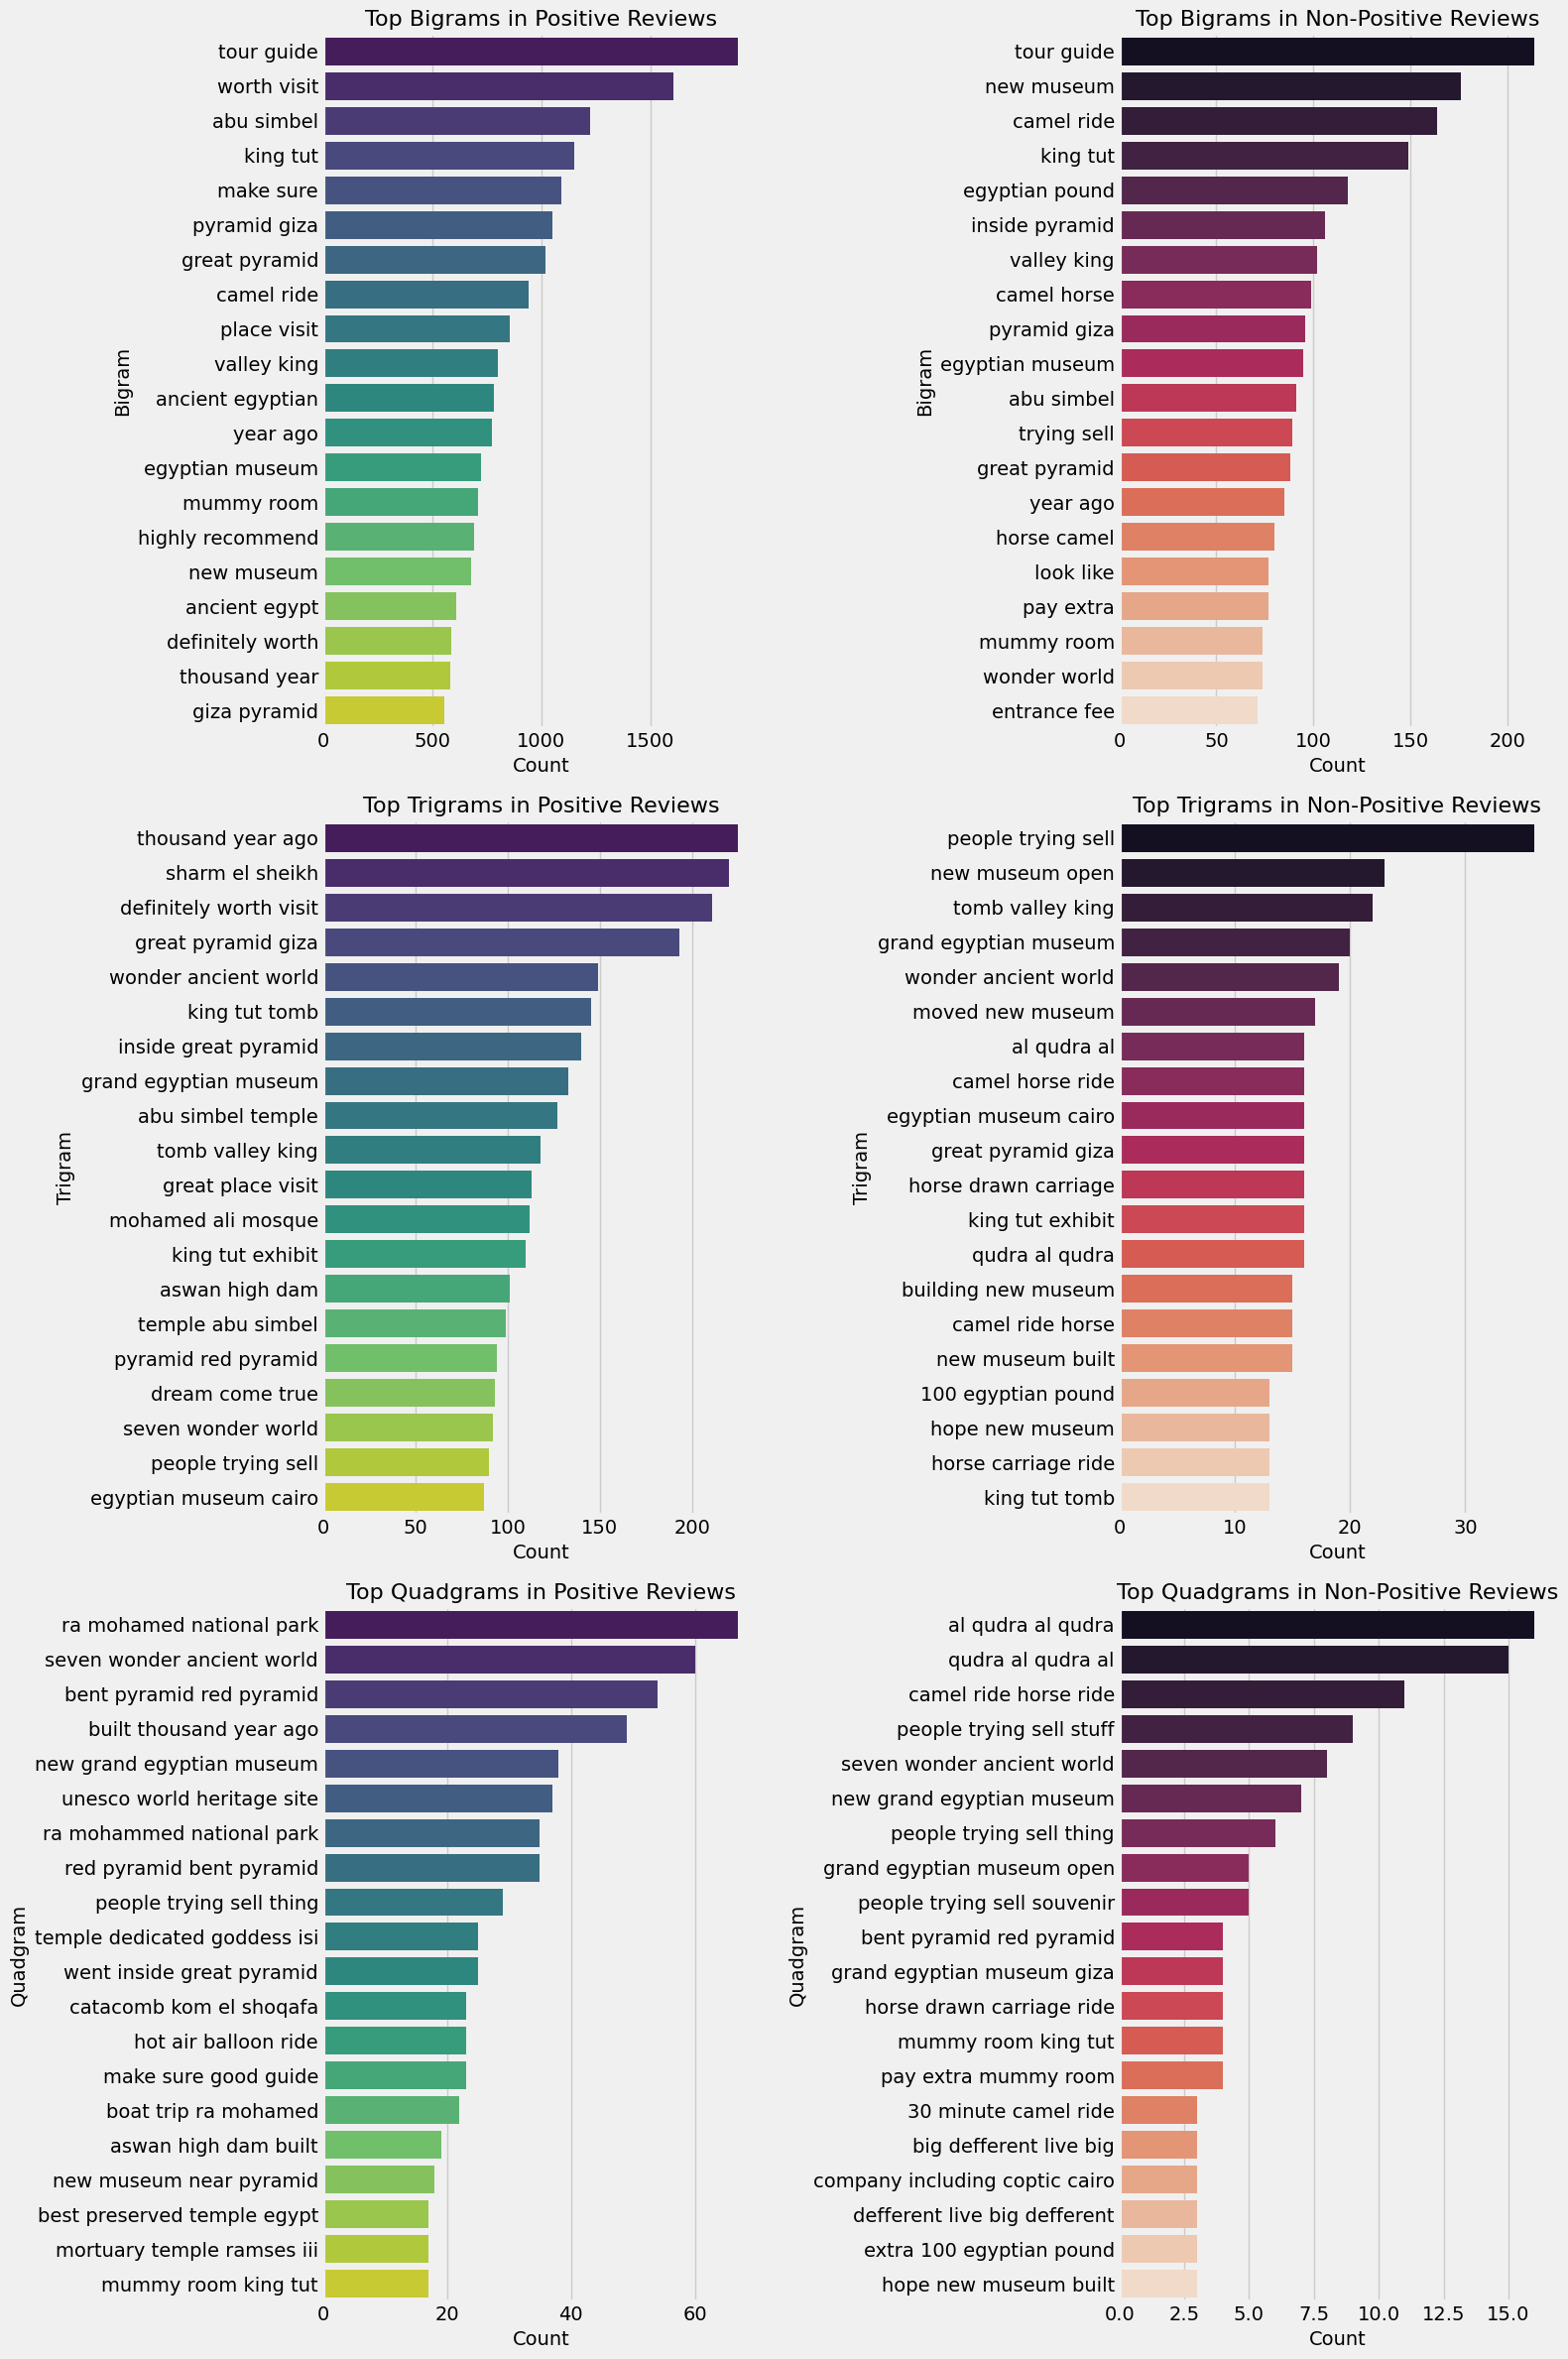

In [22]:
def get_top_n_ngrams(corpus, n=20, ngram_range=(2, 2)):
    """
    Returns the top n n-grams in a corpus
    """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    bag_of_words = vec.fit_transform(corpus)
    words = vec.get_feature_names_out()
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for idx, word in enumerate(words)]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get bigrams
top_positive_bigrams = get_top_n_ngrams(positive_reviews, ngram_range=(2, 2))
positive_bigrams_df = pd.DataFrame(top_positive_bigrams, columns=['bigram', 'count'])

top_non_positive_bigrams = get_top_n_ngrams(non_positive_reviews, ngram_range=(2, 2))
non_positive_bigrams_df = pd.DataFrame(top_non_positive_bigrams, columns=['bigram', 'count'])

# Get trigrams
top_positive_trigrams = get_top_n_ngrams(positive_reviews, ngram_range=(3, 3))
positive_trigrams_df = pd.DataFrame(top_positive_trigrams, columns=['trigram', 'count'])

top_non_positive_trigrams = get_top_n_ngrams(non_positive_reviews, ngram_range=(3, 3))
non_positive_trigrams_df = pd.DataFrame(top_non_positive_trigrams, columns=['trigram', 'count'])

# Get quadgrams
top_positive_quadgrams = get_top_n_ngrams(positive_reviews, ngram_range=(4, 4))
positive_quadgrams_df = pd.DataFrame(top_positive_quadgrams, columns=['quadgram', 'count'])

top_non_positive_quadgrams = get_top_n_ngrams(non_positive_reviews, ngram_range=(4, 4))
non_positive_quadgrams_df = pd.DataFrame(top_non_positive_quadgrams, columns=['quadgram', 'count'])

# Plot bigrams
plt.figure(figsize=(16, 24))

plt.subplot(3, 2, 1)
sns.barplot(x='count', y='bigram', data=positive_bigrams_df, palette='viridis')
plt.title('Top Bigrams in Positive Reviews', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Bigram', fontsize=14)

plt.subplot(3, 2, 2)
sns.barplot(x='count', y='bigram', data=non_positive_bigrams_df, palette='rocket')
plt.title('Top Bigrams in Non-Positive Reviews', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Bigram', fontsize=14)

# Plot trigrams
plt.subplot(3, 2, 3)
sns.barplot(x='count', y='trigram', data=positive_trigrams_df, palette='viridis')
plt.title('Top Trigrams in Positive Reviews', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Trigram', fontsize=14)

plt.subplot(3, 2, 4)
sns.barplot(x='count', y='trigram', data=non_positive_trigrams_df, palette='rocket')
plt.title('Top Trigrams in Non-Positive Reviews', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Trigram', fontsize=14)

# Plot quadgrams
plt.subplot(3, 2, 5)
sns.barplot(x='count', y='quadgram', data=positive_quadgrams_df, palette='viridis')
plt.title('Top Quadgrams in Positive Reviews', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Quadgram', fontsize=14)

plt.subplot(3, 2, 6)
sns.barplot(x='count', y='quadgram', data=non_positive_quadgrams_df, palette='rocket')
plt.title('Top Quadgrams in Non-Positive Reviews', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Quadgram', fontsize=14)

plt.tight_layout()
plt.show()

In [23]:
total_reviews = len(df)
positive_percentage = (sentiment_counts.get('positive', 0) / total_reviews) * 100
negative_percentage = (sentiment_counts.get('non_positive', 0) / total_reviews) * 100
avg_review_length = df['review_length'].mean()
avg_word_count = df['word_count'].mean()

print("EDA Summary:")
print(f"Total reviews analyzed: {total_reviews}")
print(f"Positive reviews: {sentiment_counts.get('positive', 0)} ({positive_percentage:.2f}%)")
print(f"Non-positive reviews: {sentiment_counts.get('non_positive', 0)} ({negative_percentage:.2f}%)")
print(f"Average review length: {avg_review_length:.2f} characters")
print(f"Average word count: {avg_word_count:.2f} words")

# Write a conclusion with insights
print("\nKey Insights:")
print("1. The majority of reviews are positive, indicating overall satisfaction with the tourism experience.")
print("2. Common themes in positive reviews include [insert common themes from word analysis].")
print("3. Areas of concern in non-positive reviews include [insert common issues from word analysis].")


EDA Summary:
Total reviews analyzed: 38394
Positive reviews: 34200 (89.08%)
Non-positive reviews: 4194 (10.92%)
Average review length: 361.23 characters
Average word count: 66.11 words

Key Insights:
1. The majority of reviews are positive, indicating overall satisfaction with the tourism experience.
2. Common themes in positive reviews include [insert common themes from word analysis].
3. Areas of concern in non-positive reviews include [insert common issues from word analysis].
